In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

(100, 2) (100,)


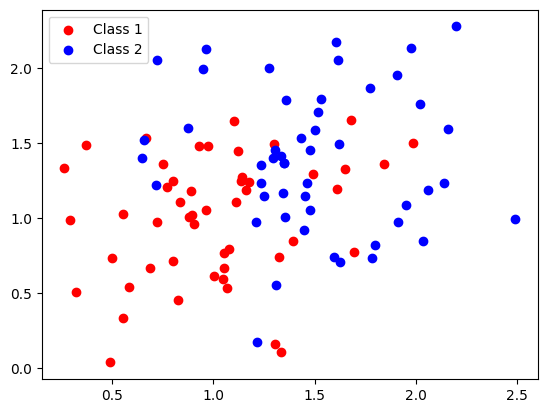

In [14]:
#2.12 variables
mu1 = np.array([[1,1]])
mu2 = np.array([[1.5, 1.5]])

sigma2 = np.array([
                [0.2, 0], 
                [0, 0.2]])

num = 50

#Generate training data
x1 = np.random.multivariate_normal(mu1.flatten(), sigma2, size=num)
x2 = np.random.multivariate_normal(mu2.flatten(), sigma2, size=num)

#Generate labels, class 1 = 0, class 2 = 1
y1 = np.zeros(num)
y2 = np.ones(num)

X, Y = np.concatenate((x1, x2), axis=0), np.concatenate((y1, y2)).astype(int)
print(X.shape, Y.shape)

#Visualize training data
plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], c='r', label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], c='b', label='Class 2')
plt.legend()
plt.show()

In [15]:
#Generate data to be classified
xt1 = np.random.multivariate_normal(mu1.flatten(), sigma2, size=2*num)
xt2 = np.random.multivariate_normal(mu2.flatten(), sigma2, size=2*num)

#Generate ground truth
yt1 = np.zeros(2*num)
yt2 = np.ones(2*num)

xt = np.concatenate((xt1, xt2), axis=0)
yt = np.concatenate((yt1, yt2)).astype(int)

In [16]:
def classifyNN(traindata, trainlabels, testdata, NN=1):
    '''
    Input:
        traindata: Data to be used to assign a classification to testdata
        trainlabels: Labels for each traindata point
        testdata: Data which we wish to classify
        NN: Number of nearest neighbours. By default equals to 1
    This function could be switched out with a scipy function which does the same, 
    but I find value in trying to do it yourself before using premade versions
    
    For every datapoint in testdata, we need to calculate the distance between it and all traindata points,
    then find the NN closest points and classify it to the majority class
    '''
    
    testpredictions = []
    
    for x in testdata:
        distances = np.linalg.norm(traindata - x, axis=-1)
        sortdistances = np.argsort(distances)
        NNclosestpoints = sortdistances[:NN]
        closestlabels = trainlabels[NNclosestpoints]
        mostcommonpoint = np.argmax(np.bincount(closestlabels))
        testpredictions.append(mostcommonpoint)
    
    return np.asarray(testpredictions)



Accuracy at NN=1 is: 0.66


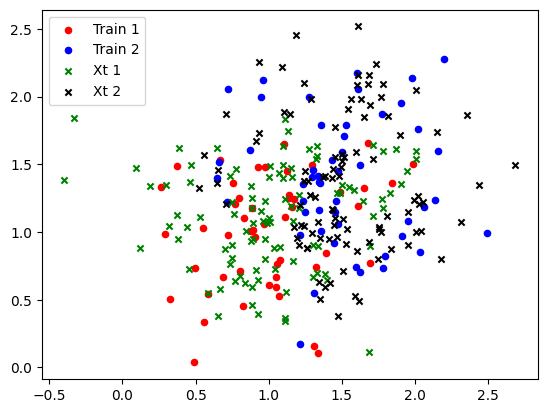

In [17]:
xt_pred = classifyNN(X, Y, xt, NN = 1)
print(f'Accuracy at NN=1 is: {np.round(np.sum(xt_pred == yt)/len(xt_pred), decimals=2)}')

xtp1 = xt[xt_pred==0]
xtp2 = xt[xt_pred==1]

plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], c='r', marker='o', s=20, label='Train 1')
plt.scatter(x2[:, 0], x2[:, 1], c='b', marker='o', s=20, label='Train 2')

plt.scatter(xtp1[:, 0], xtp1[:, 1], c='g', marker='x', s=20, label='Xt 1')
plt.scatter(xtp2[:, 0], xtp2[:, 1], c='k', marker='x', s=20, label='Xt 2')

plt.legend()
plt.show()

Accuracy at NN=1 is: 0.74


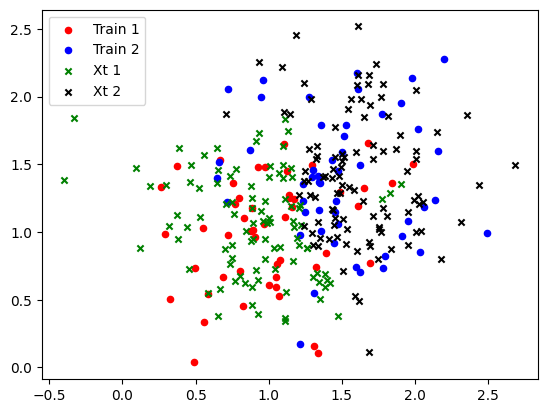

In [18]:
xt_pred = classifyNN(X, Y, xt, NN = 10)
print(f'Accuracy at NN=1 is: {np.round(np.sum(xt_pred == yt)/len(xt_pred), decimals=2)}')

xtp1 = xt[xt_pred==0]
xtp2 = xt[xt_pred==1]

plt.figure()
plt.scatter(x1[:, 0], x1[:, 1], c='r', marker='o', s=20, label='Train 1')
plt.scatter(x2[:, 0], x2[:, 1], c='b', marker='o', s=20, label='Train 2')

plt.scatter(xtp1[:, 0], xtp1[:, 1], c='g', marker='x', s=20, label='Xt 1')
plt.scatter(xtp2[:, 0], xtp2[:, 1], c='k', marker='x', s=20, label='Xt 2')

plt.legend()
plt.show()